In [1]:
# imports

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [4]:
# parameters setup

imgs_path = "./style2/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

In [5]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
files = [imgs_path + x for x in os.listdir(imgs_path) if ("png" in x or "jpg" in x)]

print("number of images:",len(files))


number of images: 2906


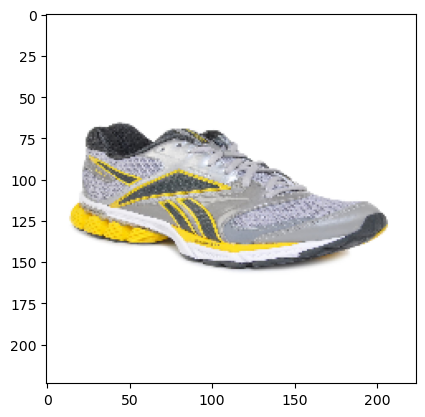

image loaded successfully!


In [7]:
# load an image in PIL format
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [8]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [9]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

1/1 [==============================] - 0s 291ms/step
features successfully extracted!
number of image features: 4096


array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        2.6469486]], dtype=float32)

In [10]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())


In [11]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

91/91 [==============================] - 171s 2s/step
features successfully extracted!


(2906, 4096)

In [12]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,./style2/10037.jpg,./style2/10039.jpg,./style2/10054.jpg,./style2/10096.jpg,./style2/10097.jpg,./style2/10110.jpg,./style2/10174.jpg,./style2/10180.jpg,./style2/10266.jpg,./style2/10267.jpg,...,./style2/9383.jpg,./style2/9396.jpg,./style2/9400.jpg,./style2/9401.jpg,./style2/9407.jpg,./style2/9430.jpg,./style2/9431.jpg,./style2/9497.jpg,./style2/9927.jpg,./style2/9952.jpg
./style2/10037.jpg,1.000000,0.873598,0.280194,0.792443,0.773661,0.758114,0.714303,0.539278,0.567351,0.722650,...,0.790060,0.541900,0.796544,0.774586,0.791089,0.740214,0.695168,0.721035,0.196564,0.201669
./style2/10039.jpg,0.873598,1.000000,0.282951,0.820082,0.786551,0.745458,0.703445,0.469774,0.547816,0.711955,...,0.804633,0.558751,0.815028,0.792983,0.816008,0.704282,0.728564,0.719568,0.198132,0.208375
./style2/10054.jpg,0.280194,0.282951,1.000000,0.345257,0.278706,0.360028,0.409081,0.278856,0.287603,0.265299,...,0.309578,0.426886,0.324972,0.267675,0.226114,0.257333,0.332702,0.302252,0.580559,0.647796
./style2/10096.jpg,0.792443,0.820082,0.345257,1.000000,0.787192,0.705910,0.674932,0.485157,0.561771,0.711387,...,0.772737,0.547985,0.735497,0.716273,0.750920,0.675430,0.694697,0.666215,0.310683,0.304111
./style2/10097.jpg,0.773661,0.786551,0.278706,0.787192,1.000000,0.671805,0.707898,0.484788,0.682510,0.838494,...,0.805290,0.536759,0.728438,0.806350,0.833896,0.802715,0.777560,0.761239,0.205743,0.202041


In [13]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("****************************************************************************************************")
    print("Original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("****************************************************************************************************")
    print("Similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("Similarity score : ",closest_imgs_scores[i])

****************************************************************************************************
Original product:


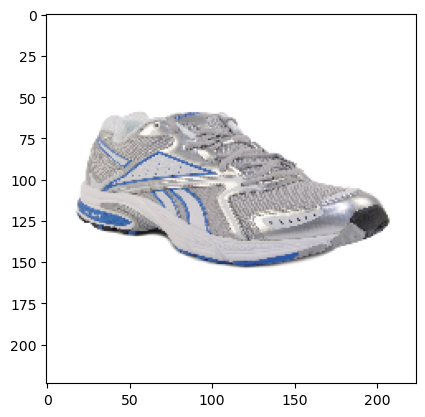

****************************************************************************************************
Similar products:


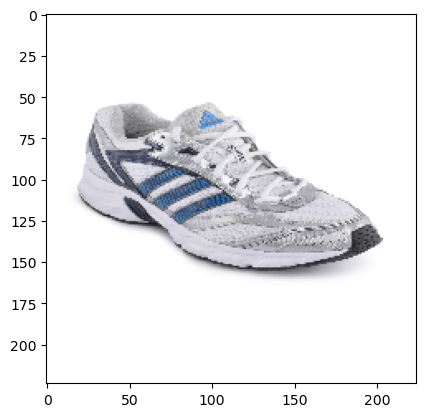

Similarity score :  0.88993686


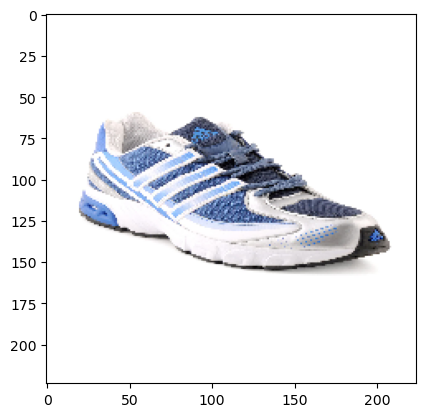

Similarity score :  0.88861424


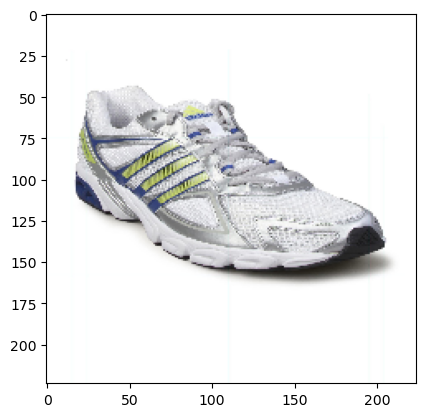

Similarity score :  0.8856348


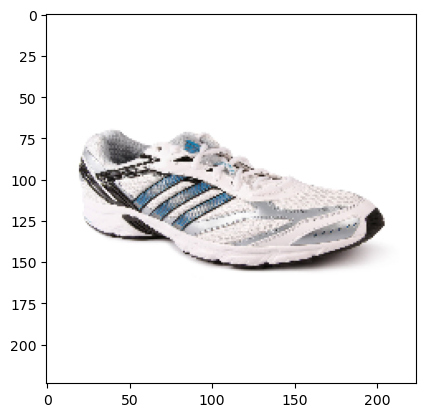

Similarity score :  0.8782115


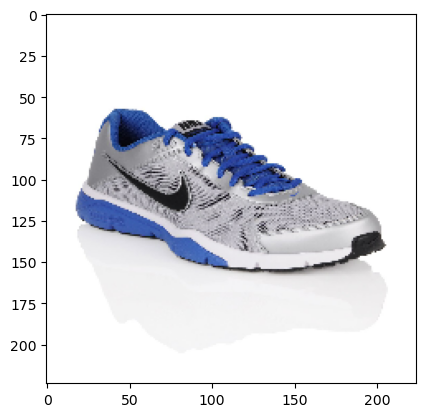

Similarity score :  0.87812185


In [14]:
retrieve_most_similar_products(files[1])

****************************************************************************************************
Original product:


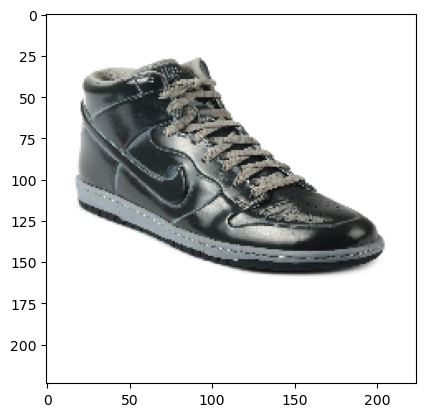

****************************************************************************************************
Similar products:


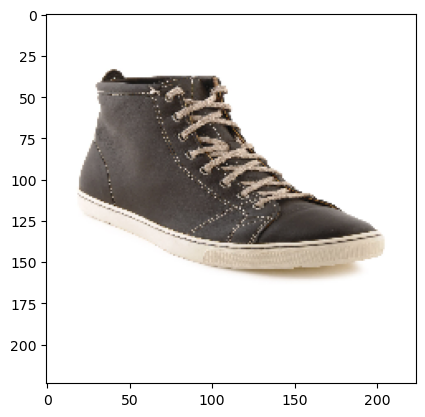

Similarity score :  0.90507656


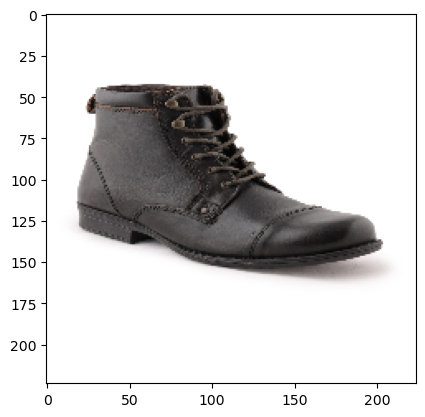

Similarity score :  0.8791493


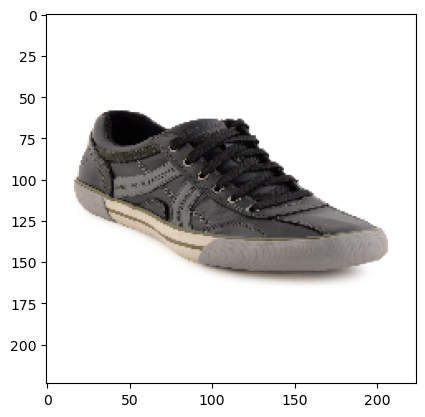

Similarity score :  0.849772


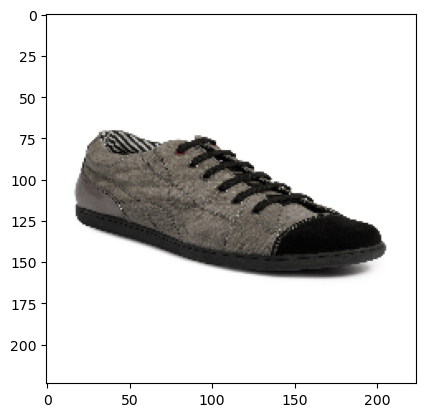

Similarity score :  0.84632623


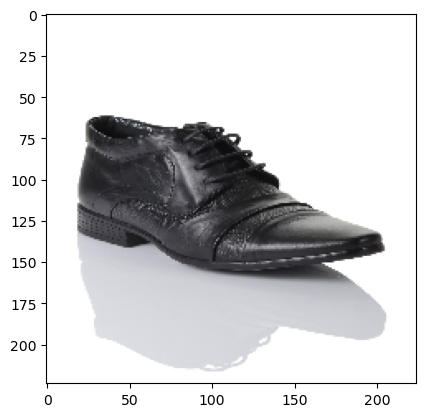

Similarity score :  0.84618956


In [18]:
retrieve_most_similar_products(files[500])